# Imports y set-up

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import gdown

In [3]:
# prompt: conexion a csv desde drive
# https://drive.google.com/file/d/12RamvTw0p2TkPwVlx_hEMF5LlImI_qqL/view?usp=sharing

#https://drive.google.com/file/d/12RamvTw0p2TkPwVlx_hEMF5LlImI_qqL/view?usp=sharing

file_id = "12RamvTw0p2TkPwVlx_hEMF5LlImI_qqL"  # Reemplázalo con el ID real del archivo
url = f"https://drive.google.com/uc?id={file_id}"

output = "bd_diaginter_ccc.csv"  # Nombre del archivo local

gdown.download(url, output, quiet=False)

df = pd.read_csv("bd_diaginter_ccc.csv", sep=';', encoding='utf8')

Downloading...
From: https://drive.google.com/uc?id=12RamvTw0p2TkPwVlx_hEMF5LlImI_qqL
To: /content/bd_diaginter_ccc.csv
100%|██████████| 1.06M/1.06M [00:00<00:00, 10.7MB/s]


# Primer acercamiento a los datos

In [4]:
for x in df.columns:
  print(x)
  print("\n")

response_id


time_started


date_submited


status


autorizacion_tratamiento


nit_anom


empresa


tamaño


sector_mcr


ciiu


sector


año_constitucion


año_operacion


registro_mercantil


camara_comercio


departamento


municipio


tipo_persona


estado_matricula


afiliado


acomp_mcr95


mcr95


acomp_mcr100


mcr100


id_persona


cargo


otro_cargo


genero


grupo_etnico


nivel_educativo


estudio_coext


exp_laboral


exp_ruedas


tipo_producto


paginaweb


linkedin


facebook


instagram


twitter


ninguna


exp_exporta


frecuencia_exporta


1_añoanterior_exporta


2_añosanteriores_exporta


3_añosanteriores_exporta


4_añosanteriores_exporta


5_añosanteriores_exporta


cinco_exporta


ninguno_exporta


ultimo_a_exporta


metodo_exporta


lineas_producto_exporta


linea1


linea2


linea3


linea4


linea5


paises_exporta


america_exporta


norteamerica_exporta


europa_exporta


asia_exporta


africa_exporta


oceania_exporta


exp_importa


metodo_import


pais

In [5]:
# prompt: show types, describe and count nulls in df
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(205, 154)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 154 entries, response_id to segmento_inter
dtypes: float64(33), int64(5), object(116)
memory usage: 246.8+ KB
None
       response_id  año_constitucion  año_operacion  acomp_mcr95       mcr95  \
count   205.000000        161.000000      51.000000   205.000000  205.000000   
mean    232.414634       2009.863354    2012.254902     0.063415    0.180488   
std     162.720405         13.943859      11.064977     0.244304    0.385535   
min       8.000000       1957.000000    1974.000000     0.000000    0.000000   
25%      97.000000       2005.000000    2009.500000     0.000000    0.000000   
50%     176.000000       2015.000000    2015.000000     0.000000    0.000000   
75%     363.000000       2020.000000    2020.000000     0.000000    0.000000   
max     558.000000       2024.000000    2023.000000     1.000000    1.000000   

       acomp_mcr100     mcr100  exp_laboral  1_añoanterior_exporta  \
co

No nos muestra toda la información porque hay demasiadas columnas

# Limpieza de Columnas
Dado a que no pudimos procesar bien la información debido a la gran cantidad de columnas, hacemos una seleccion preeliminar quitando columnas con información poco relevante como nombre de la empresa, información que no es replicable como las preguntas del diagnostico o especificas del formulario y metadatos de la herramienta

In [6]:
# Se crea una lista de las variables que corresponden a las preguntas que se realizan del diagnóstico
variables_borrar = ['direccion1', 'direccion2', 'direccion3', 'direccion4', 'direccion5', 'mercadeo1', 'mercadeo2',
                  'mercadeo3', 'mercadeo4', 'mercadeo5', 'mercadeo6', 'mercadeo7', 'portafolio1', 'portafolio2',
                  'portafolio3', 'portafolio4', 'portafolio5', 'portafolio6', 'portafolio7', 'portafolio8',
                  'portafolio9', 'portafolio10', 'portafolio11', 'finanzas1', 'finanzas2', 'finanzas3',
                  'finanzas4', 'finanzas5', 'finanzas6', 'finanzas7', 'finanzas8', 'coext1', 'coext2',
                  'coext3', 'coext4', 'coext5', 'coext6', 'coext7', 'coext8', 'response_id', 'status', 'autorizacion_tratamiento', 'estudio_coext', 'exp_ruedas', '1_añoanterior_exporta', '2_añosanteriores_exporta',
                  '3_añosanteriores_exporta', '4_añosanteriores_exporta', '5_añosanteriores_exporta', 'cinco_exporta', 'ninguno_exporta',
                  'ultimo_a_exporta', 'metodo_exporta', 'lineas_producto_exporta', 'linea1', 'linea2', 'linea3', 'linea4', 'linea5', 'america_exporta',
                  'norteamerica_exporta', 'europa_exporta', 'asia_exporta', 'africa_exporta', 'oceania_exporta', 'exp_importa', 'metodo_import',
                  'paises_importa', 'america_importa', 'norteamerica_importa', 'europa_importa', 'asia_importa', 'africa_importa', 'oceania_importa','time_started', 'date_submited','empresa',
                    'año_operacion', 'id_persona','portafolio8_certificacion1', 'portafolio8_certificacion2', 'portafolio8_certificacion3', 'portafolio8_certificacion4', 'portafolio8_certificacion5',
                    'portafolio8_certificacion6', 'portafolio8_certificacion7', 'portafolio8_certificacion_otro', 'portafolio8_certificacion_otrot', 'portafolio9_certificacion1', 'portafolio9_certificacion2',
                    'portafolio9_certificacion3', 'portafolio9_certificacion4', 'portafolio9_certificacion5', 'portafolio9_certificacion6', 'portafolio9_certificacion7', 'portafolio9_certificacion_otro',
                    'portafolio9_certificacion_otrot', 'portafolio10_certificacion1', 'portafolio10_certificacion2',
                    'portafolio10_certificacion3', 'portafolio10_certificacion4', 'portafolio10_certificacion_otro', 'portafolio10_certificacion_otrot', 'ppto_coext', 'valor_ppto_coext','ventas2023','id_form','empleados_coext']
df.drop(variables_borrar, axis=1, inplace=True)

In [7]:
#

In [8]:
df.shape


(205, 46)

In [9]:
print(df.columns)

Index(['nit_anom', 'tamaño', 'sector_mcr', 'ciiu', 'sector',
       'año_constitucion', 'registro_mercantil', 'camara_comercio',
       'departamento', 'municipio', 'tipo_persona', 'estado_matricula',
       'afiliado', 'acomp_mcr95', 'mcr95', 'acomp_mcr100', 'mcr100', 'cargo',
       'otro_cargo', 'genero', 'grupo_etnico', 'nivel_educativo',
       'exp_laboral', 'tipo_producto', 'paginaweb', 'linkedin', 'facebook',
       'instagram', 'twitter', 'ninguna', 'exp_exporta', 'frecuencia_exporta',
       'paises_exporta', 'ventas', 'exportaciones', 'exportaciones_usd',
       'empleados', 'activo_corriente', 'pasivo_corriente', 'activo_total',
       'pasivo_total', 'excedente_operativo', 'gastos_intereses',
       'año_respuesta', 'puntaje_total', 'segmento_inter'],
      dtype='object')


In [10]:
# prompt: show types, describe and count nulls in df
print(df.shape)

(205, 46)


In [11]:
df['ventas'] = df['ventas'] /1000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nit_anom             199 non-null    object 
 1   tamaño               161 non-null    object 
 2   sector_mcr           51 non-null     object 
 3   ciiu                 160 non-null    object 
 4   sector               160 non-null    object 
 5   año_constitucion     161 non-null    float64
 6   registro_mercantil   205 non-null    object 
 7   camara_comercio      188 non-null    object 
 8   departamento         205 non-null    object 
 9   municipio            205 non-null    object 
 10  tipo_persona         139 non-null    object 
 11  estado_matricula     139 non-null    object 
 12  afiliado             139 non-null    object 
 13  acomp_mcr95          205 non-null    int64  
 14  mcr95                205 non-null    int64  
 15  acomp_mcr100         98 non-null     flo

In [13]:
# prompt: ver las categorias de todas las variables categoricas

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}': {df[col].unique()}")


Column 'nit_anom': ['8be38c115e' '8d5a88ba94' '8159c0e9a8' '5051221843' 'f438ea7f2b'
 '63edb42b57' 'ccac081ff4' '2deac4706f' '9054807155' 'b5f70d57f0'
 'd5ce88fac1' '1bc2fec68e' '8fb3a24f0e' '14ac8fe089' '83520377d6'
 'afff2f7e79' 'c32b54c493' '860bc7e0b1' '73ff412dc1' 'cf41e44072'
 'c4ed8da904' 'd45cf84556' '1930c9eaa6' nan '27bc9bda58' 'b66464ee72'
 'a402f18bf2' '4f987a26c7' 'b489bb48d4' 'ea5f095198' '54cf0104a7'
 '5859ab23fa' '9985ea1a65' 'cf0ebb5676' 'afe61c511a' 'd31e032447'
 '1954d86119' '0a7b7a3022' '1a80833e3a' '1d41387e43' '130cb76c67'
 '4cdae9b988' 'c0da2537b4' '5d28a27558' '013c8d3b52' 'edd6c86e88'
 '8ae748025f' 'e05d52e2db' '02181f8df5' '9a594f0b30' '1760b44661'
 '8c5931894c' 'f49e78329e' '301d43db84' 'f3977eed8c' '3d8bd17e77'
 '9383a3c51d' '4803d448ee' '9eec1532f1' '6b6e54be12' 'dcbe65bb29'
 'a85d895b15' '38c126de8f' '7b7a244a29' '764d4281af' '02b0801870'
 '74e6422b76' '36f590b8be' '7c3e48bb33' '2c5dd35940' '48e31fc4b1'
 'e16f982ec1' '8f29bb8232' '1b3fee0d31' '88a84d9fb8' 

In [14]:
df.describe()

,año_constitucion,acomp_mcr95,mcr95,acomp_mcr100,mcr100,exp_laboral,paises_exporta,ventas,exportaciones,exportaciones_usd,empleados,activo_corriente,pasivo_corriente,activo_total,pasivo_total,excedente_operativo,gastos_intereses,año_respuesta,puntaje_total
count,161.000000,205.000000,205.000000,98.000000,98.000000,51.000000,82.000000,2.000000e+02,7.200000e+01,7.200000e+01,205.000000,1.690000e+02,1.510000e+02,1.660000e+02,1.510000e+02,1.240000e+02,9.900000e+01,205.000000,205.000000
mean,2009.863354,0.063415,0.180488,0.377551,0.622449,11.411765,4.817073,1.649392e+04,5.593249e+09,1.293991e+06,59.248780,5.471480e+10,4.020635e+10,9.597734e+10,5.388394e+10,3.347751e+09,6.416224e+08,2024.000000,2.057415
std,13.943859,0.244304,0.385535,0.487267,0.487267,10.651153,4.871505,1.039773e+05,2.125447e+10,4.914159e+06,173.219094,5.868781e+11,3.946687e+11,1.077180e+12,5.473900e+11,2.596608e+10,2.476780e+09,0.408248,0.450447
min,1957.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e-01,3.000000e+05,6.936336e+01,0.000000,4.350000e+02,1.620000e+02,4.450000e+02,3.350000e+02,1.000000e+00,1.800000e+03,2023.000000,1.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000,5.000000e+01,2.350000e+07,5.433463e+03,4.000000,2.556983e+07,2.359250e+07,4.046328e+07,2.888835e+07,1.844742e+07,3.061420e+06,2024.000000,1.710000
50%,2015.000000,0.000000,0.000000,0.000000,1.000000,8.000000,3.000000,6.599285e+02,1.552886e+08,3.672645e+04,10.000000,2.000000e+08,2.013118e+08,4.341037e+08,2.790000e+08,8.498288e+07,3.083600e+07,2024.000000,2.080000
75%,2020.000000,0.000000,0.000000,1.000000,1.000000,17.500000,5.750000,5.219149e+03,1.462196e+09,3.380760e+05,36.000000,2.355876e+09,1.453324e+09,3.257866e+09,2.454482e+09,4.995922e+08,2.918540e+08,2024.000000,2.380000
max,2024.000000,1.000000,1.000000,1.000000,1.000000,40.000000,30.000000,1.428030e+06,1.513770e+11,3.500000e+07,2000.000000,7.563950e+12,4.818790e+12,1.384770e+13,6.706420e+12,2.880000e+11,2.091113e+10,2025.000000,2.970000


In [15]:
# Valores únicos.

df['segmento_inter'].value_counts()

,count
segmento_inter,
Principiante,106
Junior,88
Senior,10
Top,1


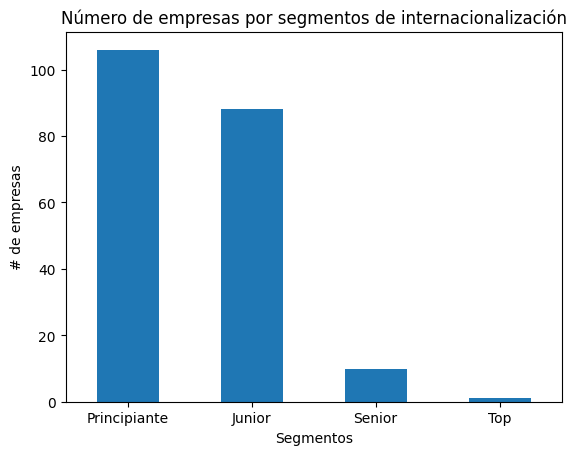

In [16]:
df['segmento_inter'].value_counts().plot(kind="bar")
plt.title("Número de empresas por segmentos de internacionalización")
plt.xlabel("Segmentos")
plt.xticks(rotation=0)
plt.ylabel("# de empresas")
plt.show()

### Tarea 01/3/2025:
Hacer un estado del arte para saber que datos, modelos o algoritmos se han utilizado
Hacer analisis univariado
Hacer analisis multivariado

In [17]:
df.duplicated().sum()

0

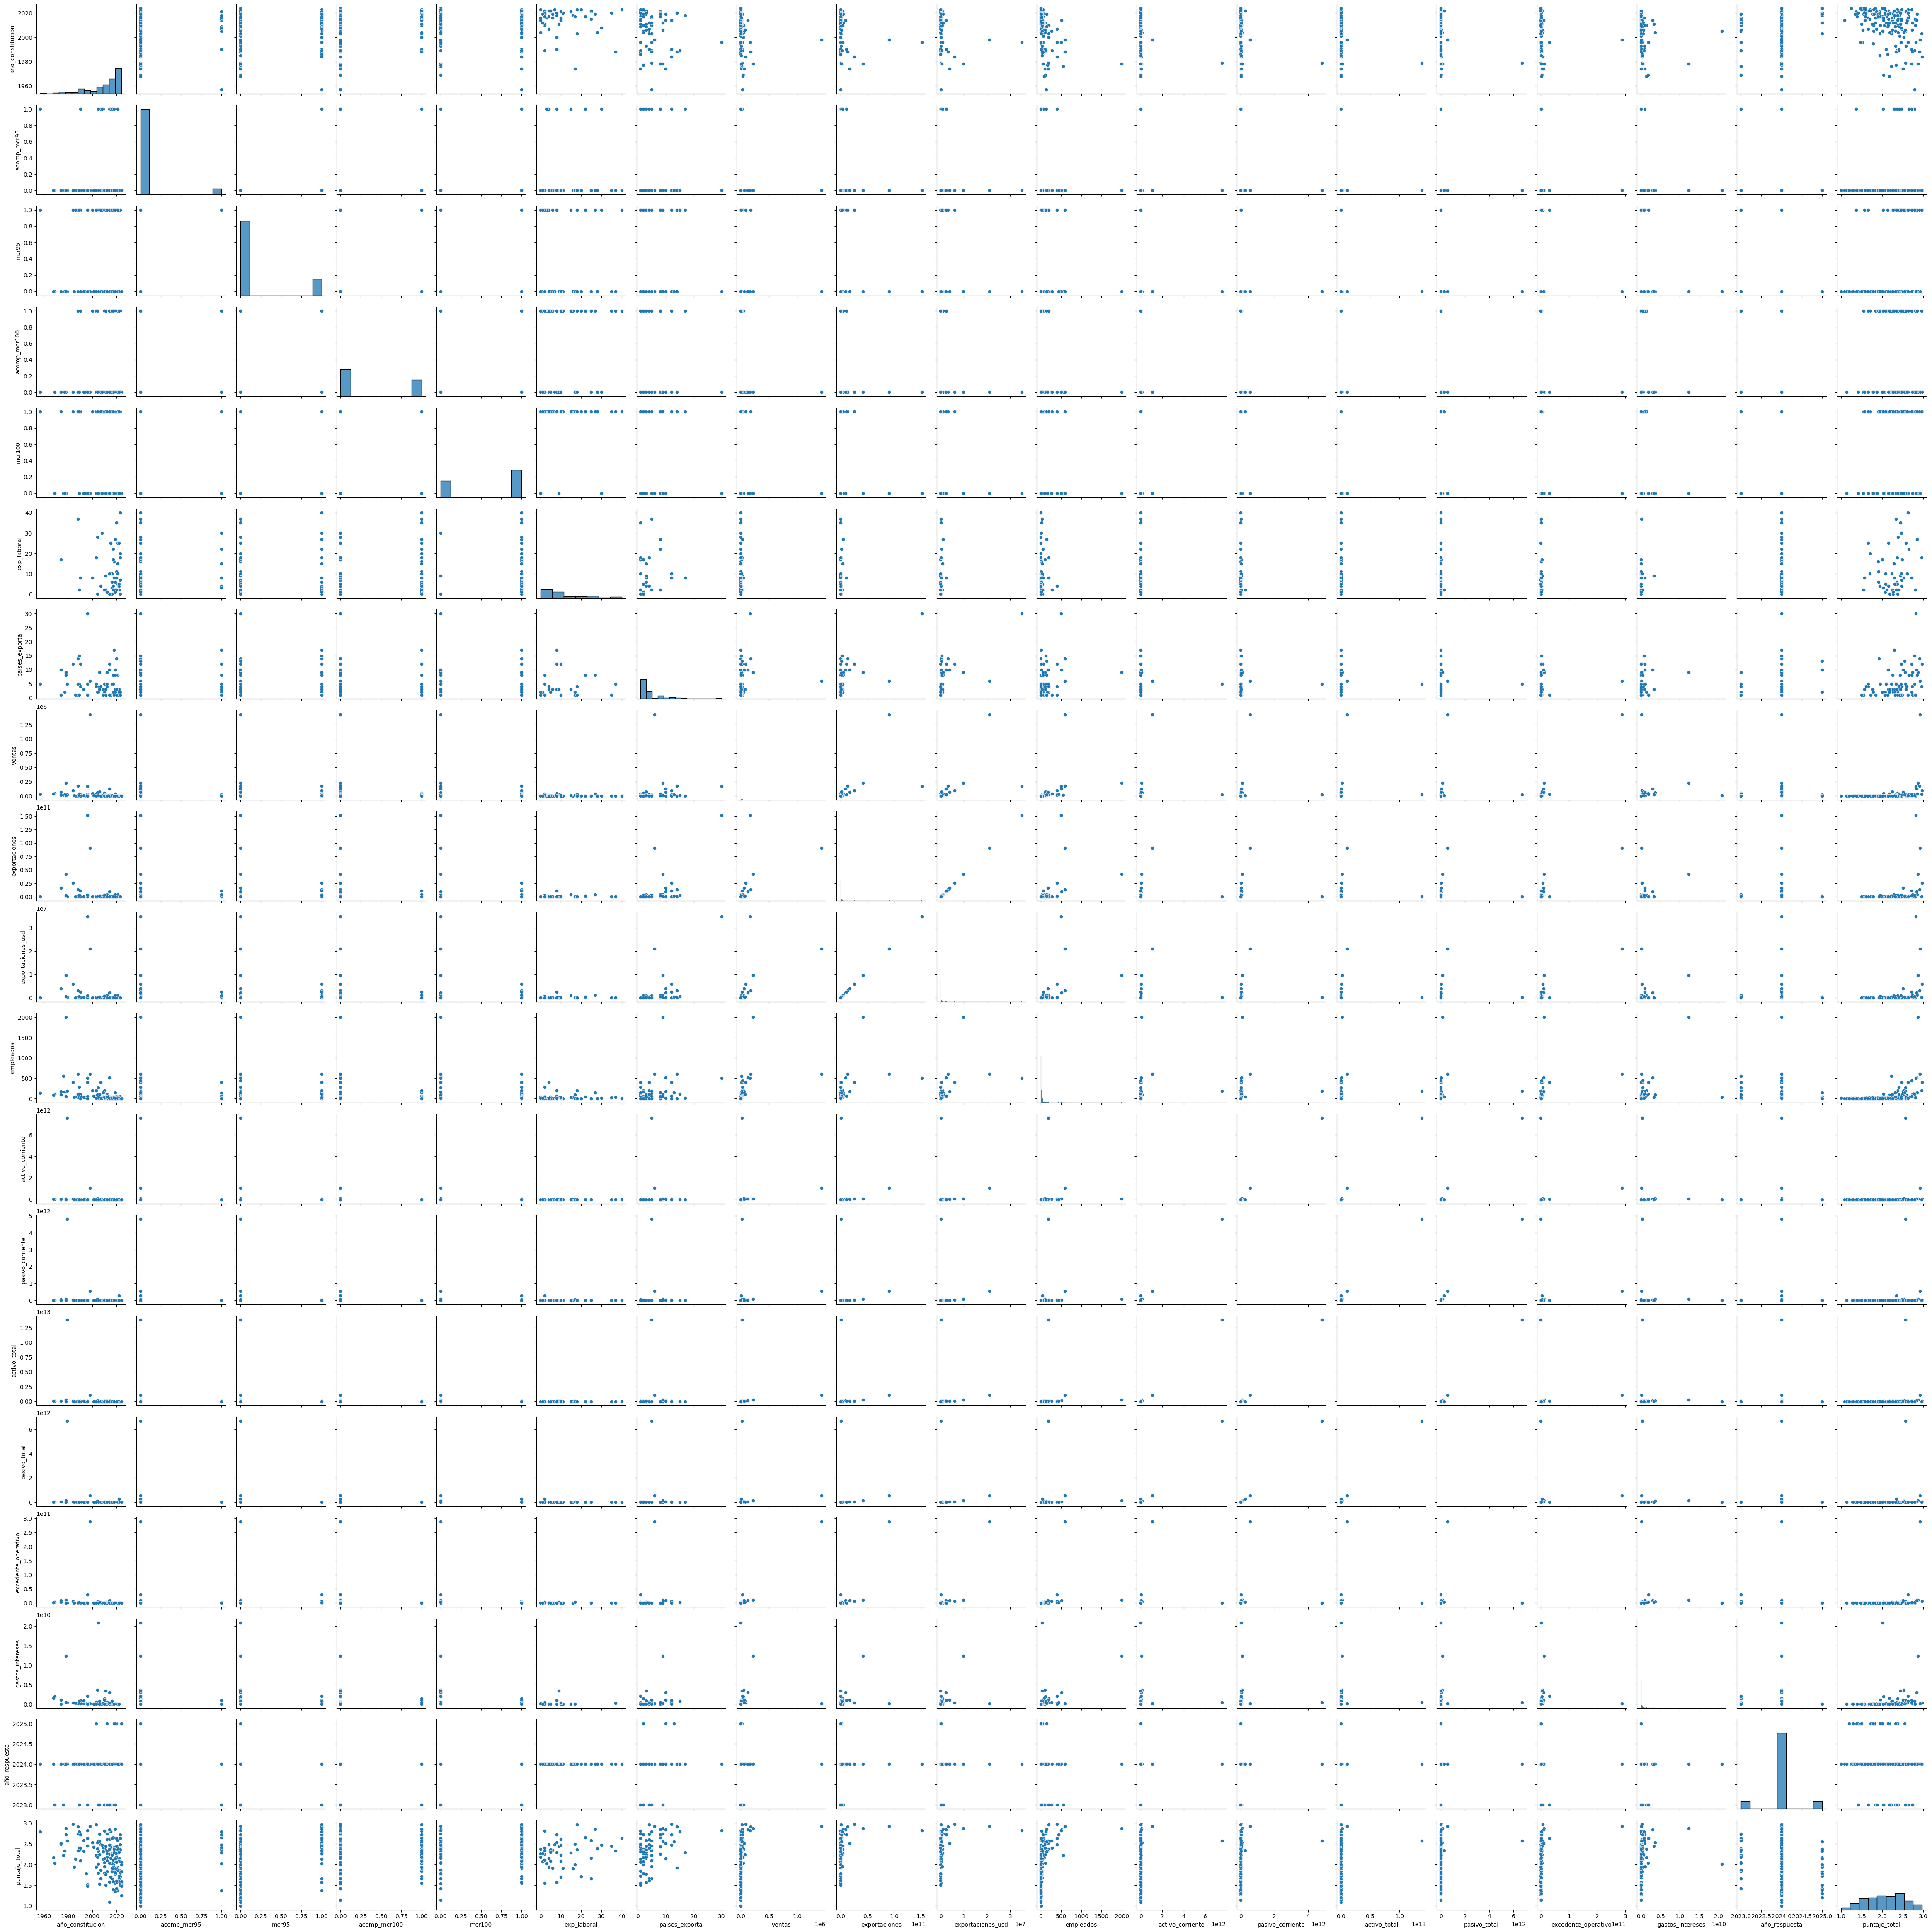

In [18]:
# prompt: grafiaca pairplot para df

# Assuming df is already defined and cleaned as in the provided code.

sns.pairplot(df)
plt.show()


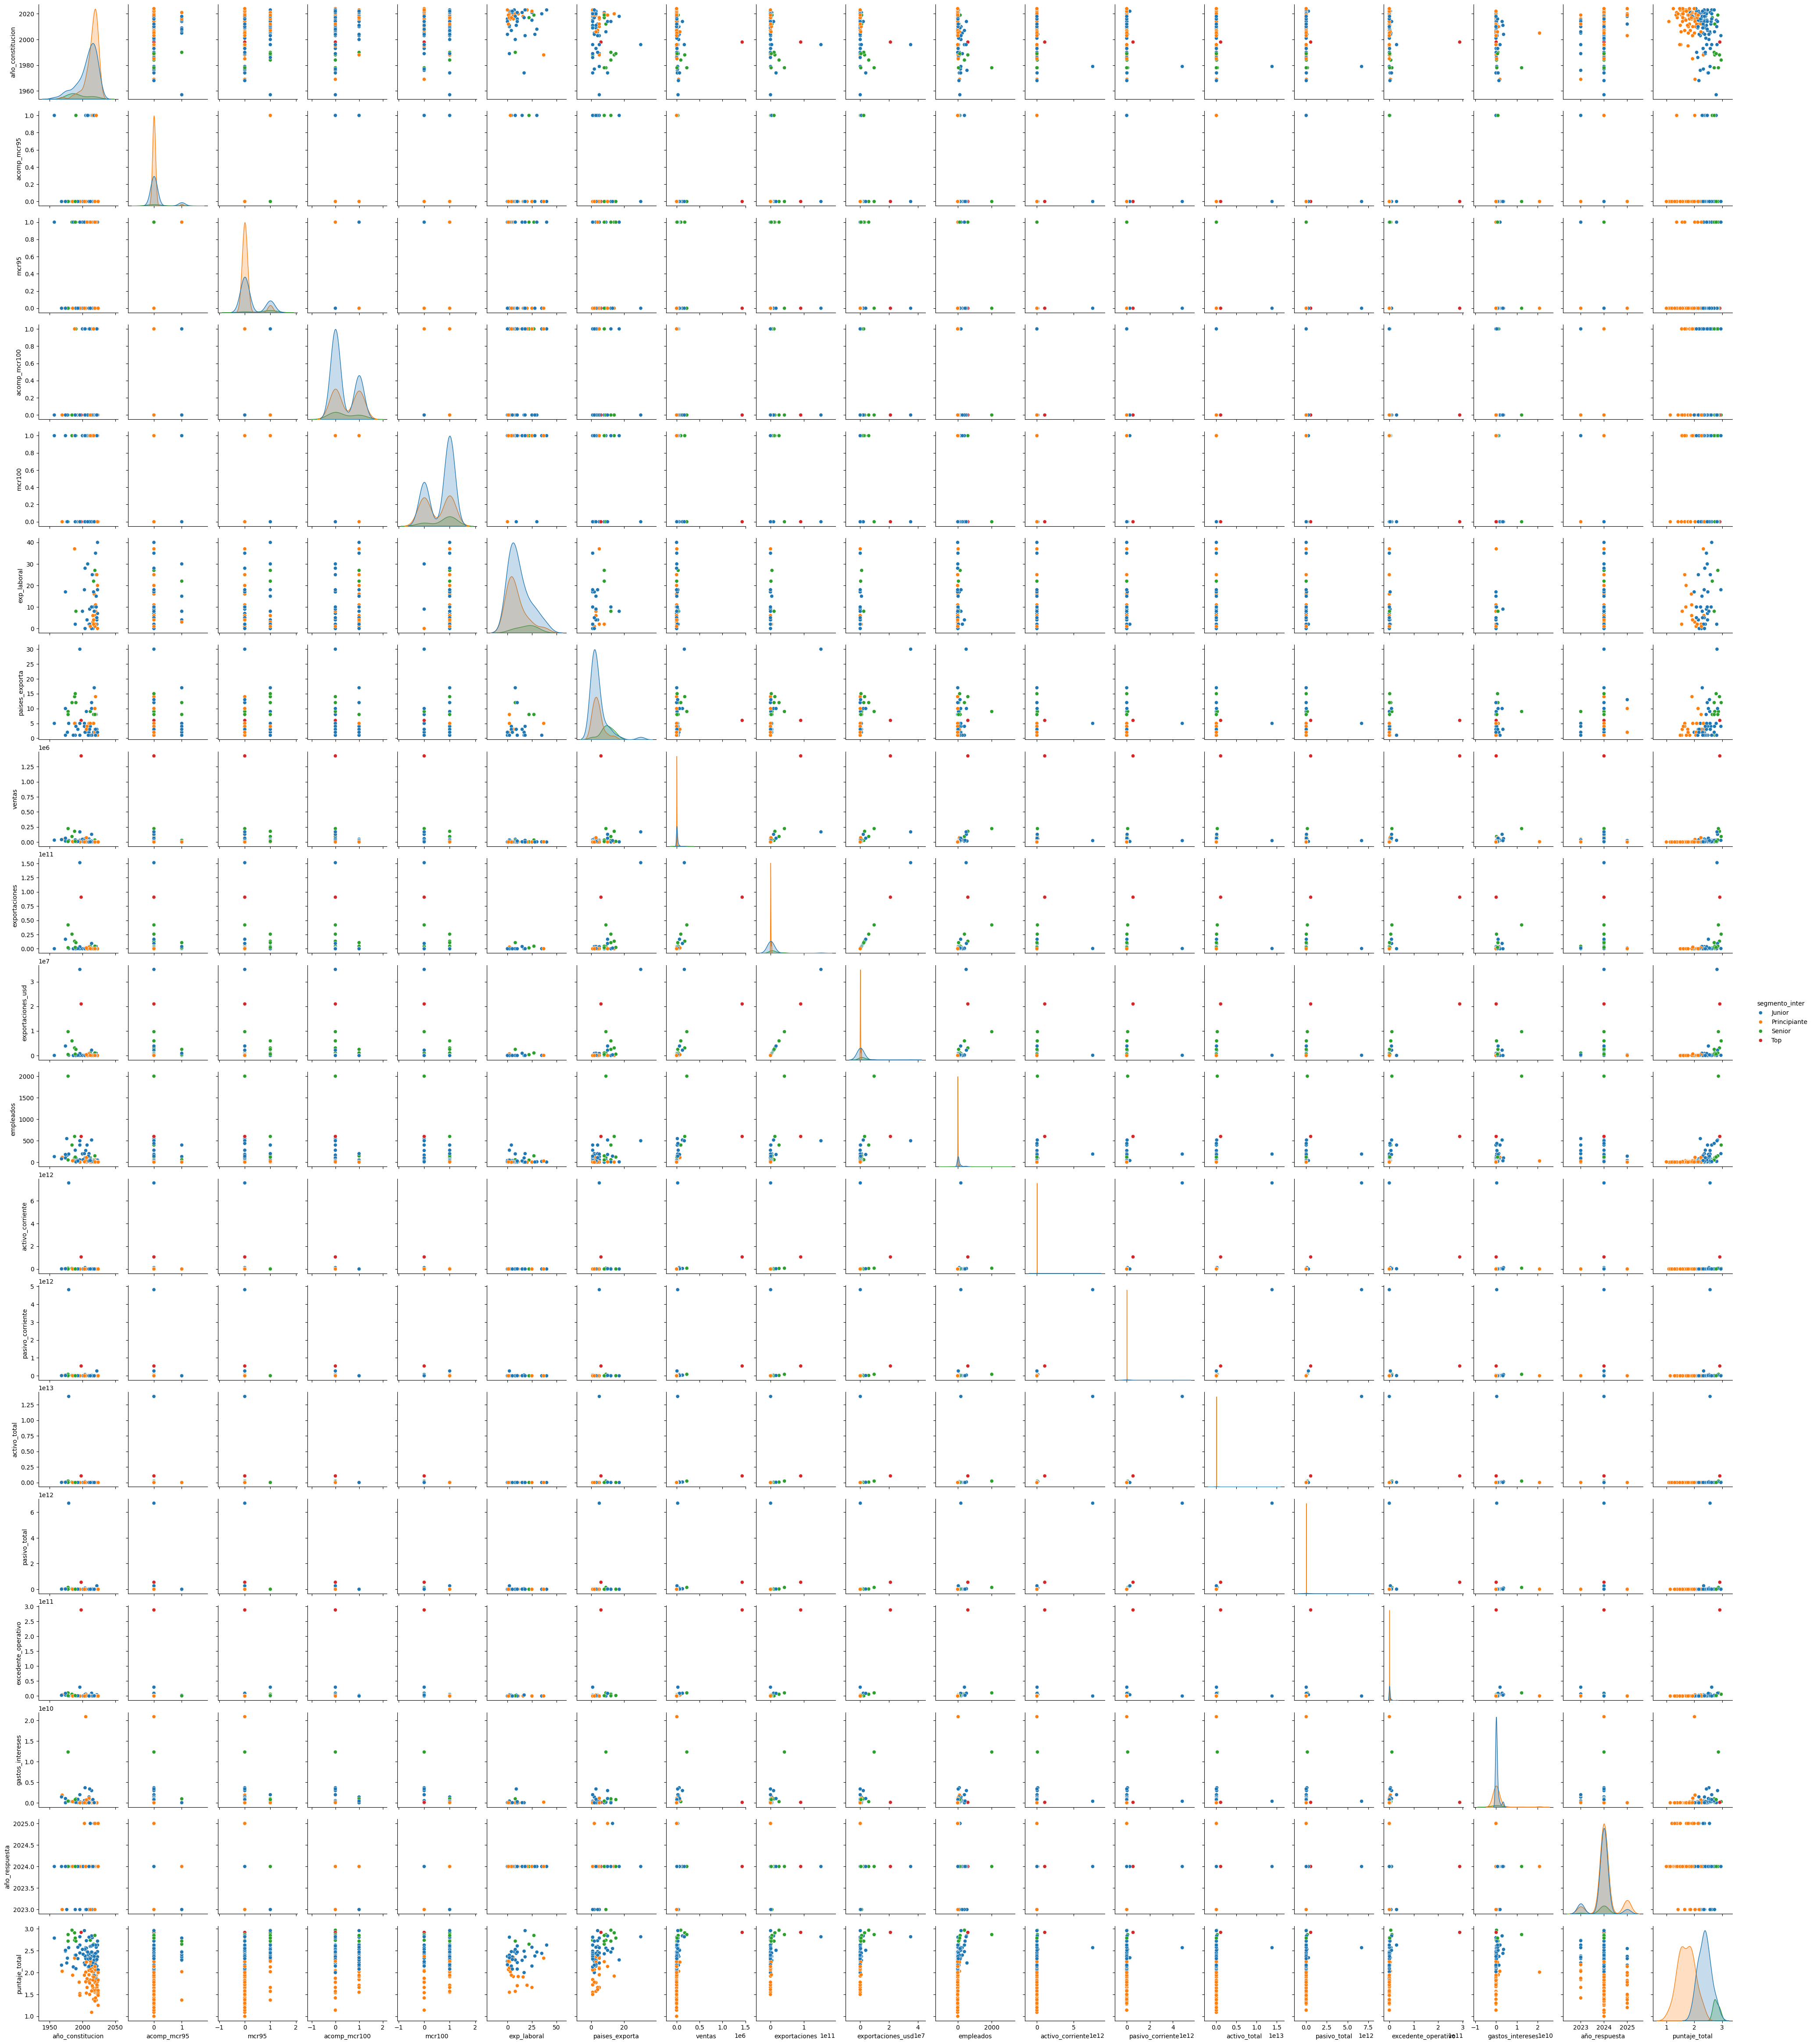

In [19]:
sns.pairplot(data=df,
             hue='segmento_inter',
             aspect=.85);

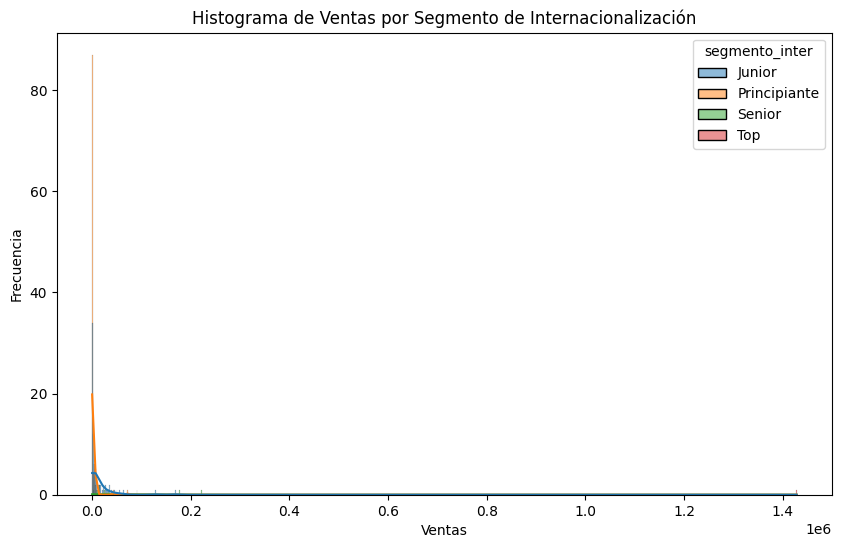

In [20]:
# prompt: histograma para 'ventas' con hue de 'segmento_inter'

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ventas', hue='segmento_inter', kde=True,bins='auto')
plt.title('Histograma de Ventas por Segmento de Internacionalización')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()


In [21]:
# prompt: pasar los valores de segmento inter a 0 1 2 3

# Create a mapping dictionary for the 'segmento_inter' column
mapping = {
    'Principiante': 1,
    'Junior': 2,
    'Senior': 3,
    'Top': 4
}

# Use the mapping dictionary to replace the values in the 'segmento_inter' column
df['segmento_inter'] = df['segmento_inter'].replace(mapping)

# Print the value counts of the modified 'segmento_inter' column
print(df['segmento_inter'].value_counts())


segmento_inter
1    106
2     88
3     10
4      1
Name: count, dtype: int64


<ipython-input-21-ecfd90091df7>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['segmento_inter'] = df['segmento_inter'].replace(mapping)


## Análisis Univariado

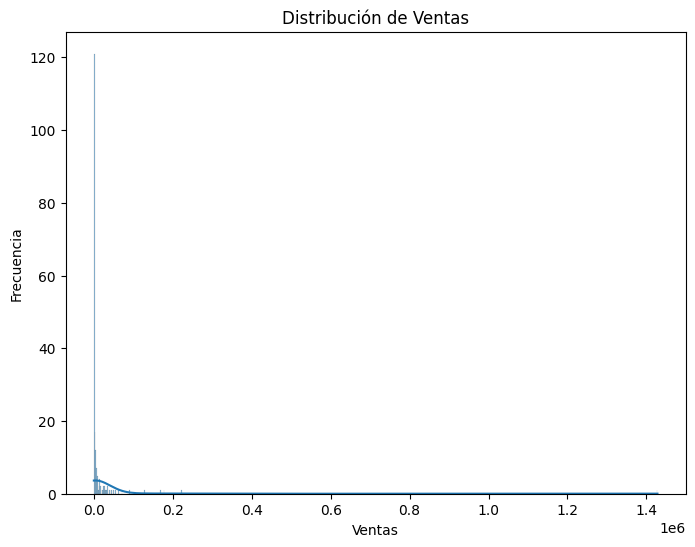

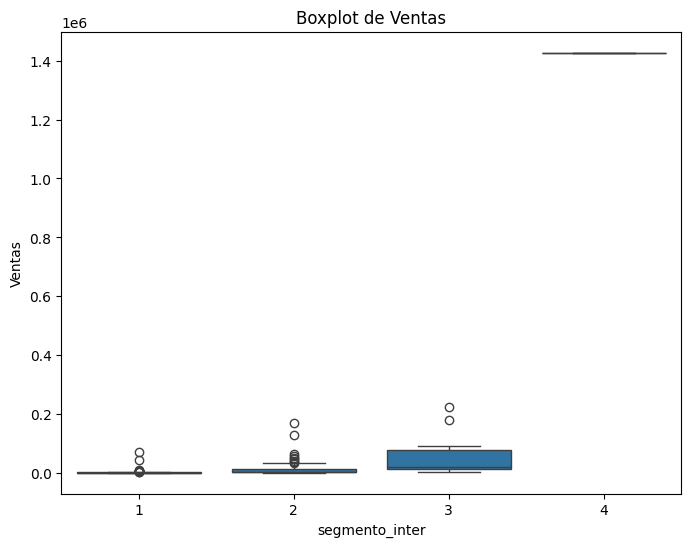

count    2.000000e+02
mean     1.649392e+04
std      1.039773e+05
min      5.000000e-01
25%      5.000000e+01
50%      6.599285e+02
75%      5.219149e+03
max      1.428030e+06
Name: ventas, dtype: float64
Número de outliers en 'ventas': 32


,nit_anom,tamaño,sector_mcr,ciiu,sector,año_constitucion,registro_mercantil,camara_comercio,departamento,municipio,...,empleados,activo_corriente,pasivo_corriente,activo_total,pasivo_total,excedente_operativo,gastos_intereses,año_respuesta,puntaje_total,segmento_inter
0,8be38c115e,MEDIANA,NaN,8010 - Actividades de seguridad privada ...,Actividades de servicios administrativos y de ...,1976.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,550,NaN,NaN,NaN,NaN,NaN,NaN,2023,2.22,2
5,63edb42b57,GRANDE,NaN,"2100 - Fabricacion de productos farmaceuticos,...",Industrias manufactureras,2010.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,YUMBO,...,200,3.074572e+10,2.730251e+10,3.912458e+10,2.996229e+10,1.553380e+09,1.400000e+09,2023,2.37,2
6,ccac081ff4,GRANDE,NaN,4774 - Comercio al por menor de otros nuevos p...,Comercio al por mayor y al por menor; reparaci...,1969.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,113,1.337460e+10,1.631027e+10,4.738938e+10,2.911297e+10,4.181990e+09,1.869103e+09,2023,2.03,1
9,b5f70d57f0,GRANDE,NaN,4773 - Comercio al por menor en droguerias y p...,Comercio al por mayor y al por menor; reparaci...,1996.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,400,2.389781e+10,7.566175e+09,3.579650e+10,7.566175e+09,2.963373e+10,1.960933e+09,2023,2.63,2
11,1bc2fec68e,MEDIANA,NaN,2023 - Fabricacion de cosmeticos y preparados ...,Industrias manufactureras,2012.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,102,1.125560e+10,4.759477e+09,1.214095e+10,7.410686e+09,1.763964e+07,2.365158e+08,2023,2.74,3
12,8fb3a24f0e,MEDIANA,NaN,4773 - Comercio al por menor de productos farm...,Comercio al por mayor y al por menor; reparaci...,2005.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,273,9.897332e+09,5.858900e+09,1.613755e+10,5.870319e+09,6.798864e+09,4.682347e+08,2023,2.57,2
26,a402f18bf2,MEDIANA,NaN,"2023 - Fabricación de jabones y detergentes, p...",Industrias manufactureras,1988.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,103,6.613628e+09,3.814252e+09,9.485922e+09,4.227496e+09,2.334054e+09,1.156358e+08,2024,2.74,3
28,b489bb48d4,GRANDE,NaN,1089 - Elaboración de otros productos alimenti...,Industrias manufactureras,1988.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,YUMBO,...,600,NaN,NaN,NaN,NaN,NaN,NaN,2024,2.91,3
32,9985ea1a65,GRANDE,NaN,127 - Produccion especializada de te ...,"Agricultura, ganadería, caza, silvicultura y p...",1984.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,YUMBO,...,400,5.011970e+10,1.858685e+10,6.649492e+10,2.324280e+10,6.023131e+09,2.715290e+08,2024,2.97,3
33,cf0ebb5676,GRANDE,NaN,1052 - Elaboración de almidones y productos de...,Industrias manufactureras,1998.0,Sí,Cámara de Comercio de Cali,Valle del Cauca,CALI,...,600,1.062120e+12,5.467150e+11,1.062120e+12,5.467150e+11,2.880000e+11,1.000000e+08,2024,2.92,4


In [22]:
# prompt: Analisis univariado para df['ventas']

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['ventas'], kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ventas'],x=df['segmento_inter'], data=df)
plt.title('Boxplot de Ventas')
plt.ylabel('Ventas')
plt.show()

# Summary statistics
print(df['ventas'].describe())

# Check for outliers (using IQR method)
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ventas'] < lower_bound) | (df['ventas'] > upper_bound)]
print(f"Número de outliers en 'ventas': {len(outliers)}")
outliers


In [23]:
outliers[['ventas','segmento_inter']]

,ventas,segmento_inter
0,1.600000e+04,2
5,5.000000e+04,2
6,4.296162e+04,1
9,2.800000e+04,2
11,1.570510e+04,3
12,3.384848e+04,2
26,1.500000e+04,3
28,1.771080e+05,3
32,9.140882e+04,3
33,1.428030e+06,4


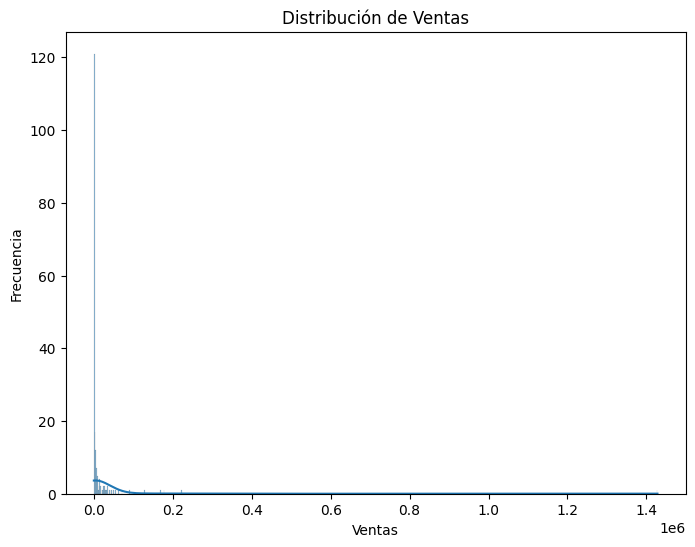

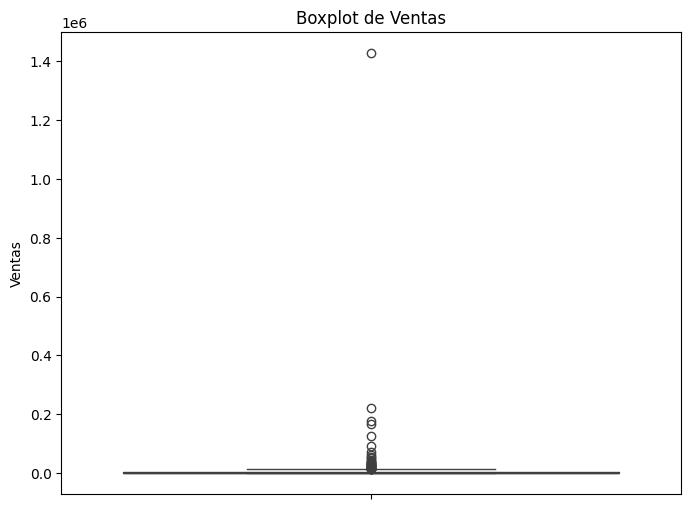

In [24]:
# prompt: quitar filas que tengan en df['segmento_inter'] "top"

# Remove rows where 'segmento_inter' is "top"
df2 = df[df['segmento_inter'] != 'Top']

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df2['ventas'], kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['ventas'])
plt.title('Boxplot de Ventas')
plt.ylabel('Ventas')
plt.show()

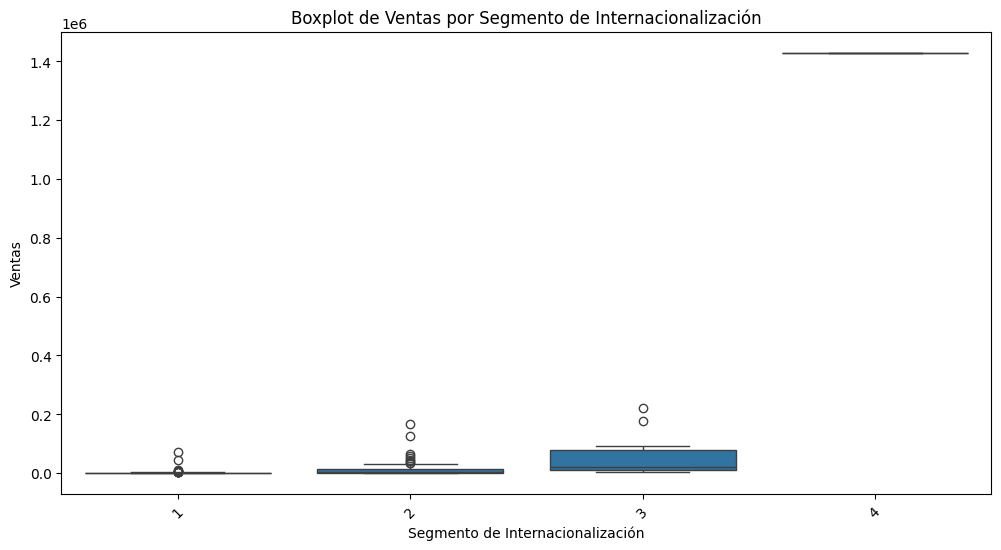

In [25]:
# prompt: diferentes boxplot relacionando ventas dividas por segmenteo inter

# Create the boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='segmento_inter', y='ventas', data=df)
plt.title('Boxplot de Ventas por Segmento de Internacionalización')
plt.xlabel('Segmento de Internacionalización')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()


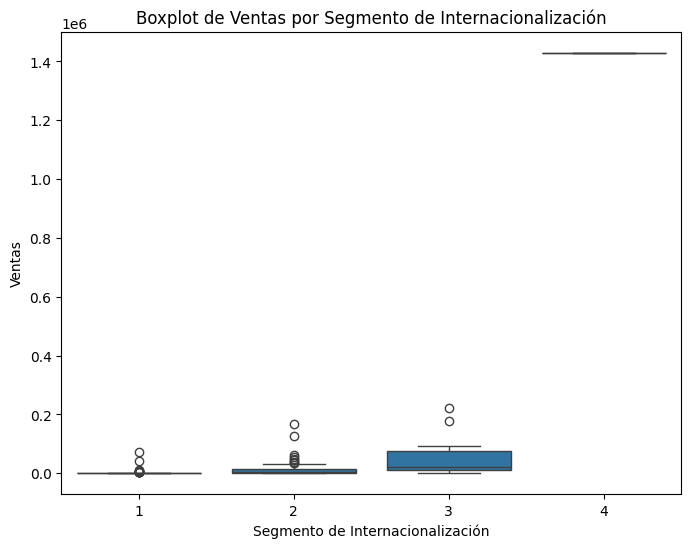

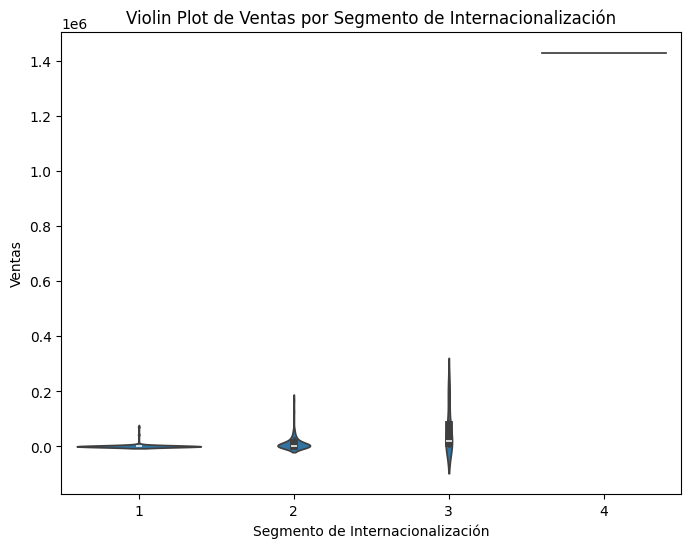

Estadísticas descriptivas para el segmento 2:
count        87.000000
mean      12323.264682
std       25158.156577
min           3.700000
25%         337.500000
50%        3324.057202
75%       13440.461101
max      168000.000000
Name: ventas, dtype: float64


Estadísticas descriptivas para el segmento 1:
count      102.000000
mean      1932.444435
std       8255.634025
min          0.500000
25%         20.500000
50%        140.500000
75%        944.185821
max      71373.648370
Name: ventas, dtype: float64


Estadísticas descriptivas para el segmento 3:
count        10.000000
mean      60152.146933
std       78523.084136
min        2056.567619
25%       11756.882597
50%       20558.437014
75%       76920.775575
max      222557.000000
Name: ventas, dtype: float64


Estadísticas descriptivas para el segmento 4:
count          1.0
mean     1428030.0
std            NaN
min      1428030.0
25%      1428030.0
50%      1428030.0
75%      1428030.0
max      1428030.0
Name: ventas, dtype: float6

In [26]:
# prompt: analisis univariado para 'ventas' segmentado por 'segmento_inter'

# Assuming df is already defined and cleaned as in the provided code.
# and the 'segmento_inter' column has been numerically encoded.


# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='segmento_inter', y='ventas', data=df)
plt.title('Boxplot de Ventas por Segmento de Internacionalización')
plt.xlabel('Segmento de Internacionalización')
plt.ylabel('Ventas')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='segmento_inter', y='ventas', data=df)
plt.title('Violin Plot de Ventas por Segmento de Internacionalización')
plt.xlabel('Segmento de Internacionalización')
plt.ylabel('Ventas')
plt.show()

# Descriptive statistics per segment
for segment in df['segmento_inter'].unique():
    segment_data = df[df['segmento_inter'] == segment]['ventas']
    print(f"Estadísticas descriptivas para el segmento {segment}:")
    print(segment_data.describe())
    print("\n")


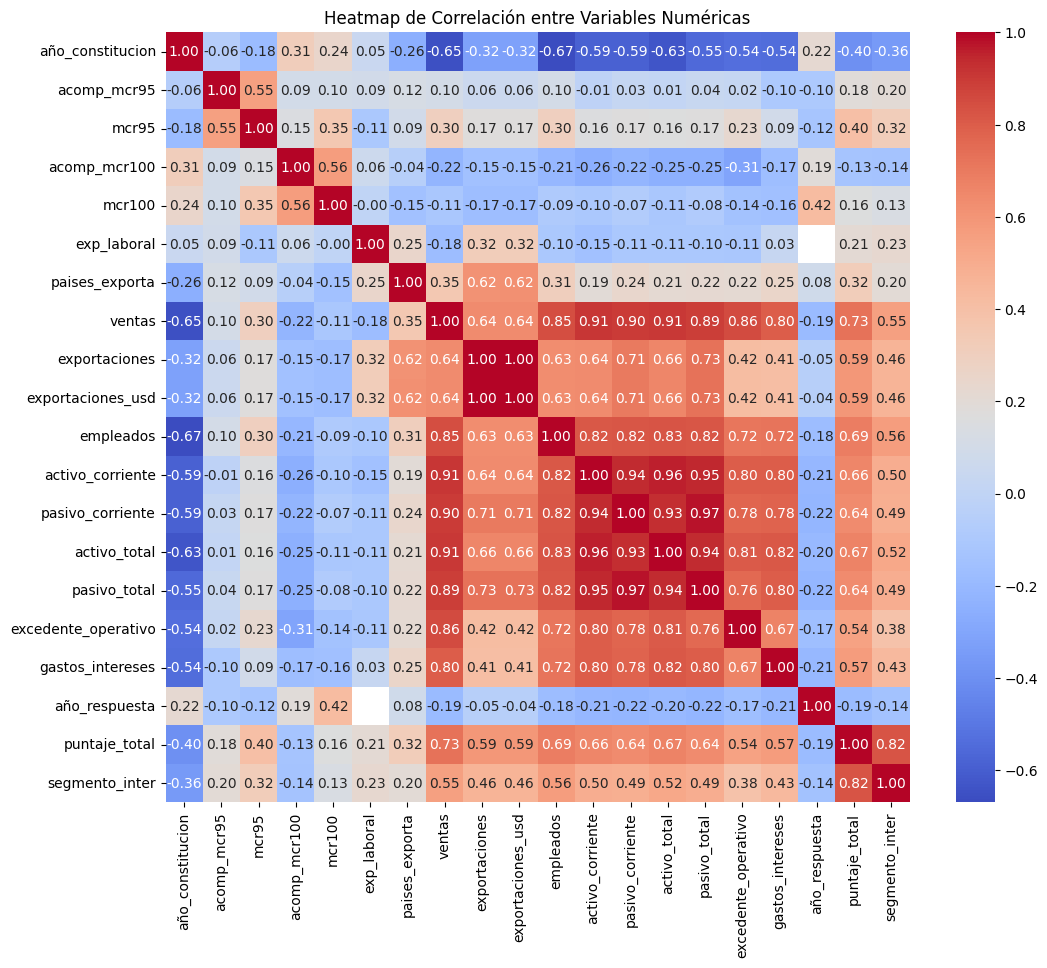

In [27]:
# prompt: heatmap de solo las variables numericas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and cleaned as in the provided code.
# and the 'segmento_inter' column has been numerically encoded.

# Select only numeric columns for the heatmap
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr('spearman')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()
